<a href="https://colab.research.google.com/github/parhamvz73/Machine-Learning/blob/main/Superstore_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and importing CSV file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
def read_csv(path = str):
  """
  this function will get the path for the csv file as `string` and will return a success message together with data frame shape
  """
  try:
       dataframe = pd.read_csv(path, encoding="ISO-8859-1")
       print(f"✅ CSV successfully imported from: {path}")
       print(f"📊 Data frame shape: {dataframe.shape}")
       return dataframe
  except Exception as e:
      print(f"❌ Could not import CSV due to: {e}")
      return None

In [ ]:
df = read_csv("/content/drive/MyDrive/Data Analysis Projects/Superstore Dataset/data/Sample - Superstore.csv")

✅ CSV successfully imported from: /content/drive/MyDrive/Data Analysis Projects/Superstore Dataset/data/Sample - Superstore.csv
📊 Data frame shape: (9994, 21)


In [ ]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


# Feature engineering and interaction features

## Order ID

In [ ]:
split_cols = df["Order ID"].str.split("-", expand = True)
split_cols.columns = ['Order_Prefix','Order_Year','Order_ID']
df = pd.concat([df, split_cols], axis = 1)

In [ ]:
df[['Order ID','Order_Prefix','Order_Year','Order_ID']]

,Order ID,Order_Prefix,Order_Year,Order_ID
0,CA-2016-152156,CA,2016,152156
1,CA-2016-152156,CA,2016,152156
2,CA-2016-138688,CA,2016,138688
3,US-2015-108966,US,2015,108966
4,US-2015-108966,US,2015,108966
...,...,...,...,...
9989,CA-2014-110422,CA,2014,110422
9990,CA-2017-121258,CA,2017,121258
9991,CA-2017-121258,CA,2017,121258
9992,CA-2017-121258,CA,2017,121258


In [ ]:
df.drop('Order ID', axis = 1, inplace = True)

In [ ]:
df.head(20)

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Prefix,Order_Year,Order_ID
0,1,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,CA,2016,152156
1,2,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,CA,2016,152156
2,3,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA,2016,138688
3,4,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,US,2015,108966
4,5,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,US,2015,108966
5,6,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,CA,2014,115812
6,7,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,CA,2014,115812
7,8,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,CA,2014,115812
8,9,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,CA,2014,115812
9,10,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,CA,2014,115812


## Order Date

In [ ]:
split_cols = df['Order Date'].str.split('/', expand = True)
split_cols.columns = ['Order_Month','Order_Day','Order_Year2']
df = pd.concat([df, split_cols], axis = 1)

In [ ]:
df.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sales,Quantity,Discount,Profit,Order_Prefix,Order_Year,Order_ID,Order_Month,Order_Day,Order_Year2
0,1,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,261.9600,2,0.00,41.9136,CA,2016,152156,11,8,2016
1,2,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,731.9400,3,0.00,219.5820,CA,2016,152156,11,8,2016
2,3,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,14.6200,2,0.00,6.8714,CA,2016,138688,6,12,2016
3,4,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,957.5775,5,0.45,-383.0310,US,2015,108966,10,11,2015
4,5,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,22.3680,2,0.20,2.5164,US,2015,108966,10,11,2015


In [ ]:
df[['Order Date','Order_Month','Order_Day','Order_Year2']]

,Order Date,Order_Month,Order_Day,Order_Year2
0,11/8/2016,11,8,2016
1,11/8/2016,11,8,2016
2,6/12/2016,6,12,2016
3,10/11/2015,10,11,2015
4,10/11/2015,10,11,2015
...,...,...,...,...
9989,1/21/2014,1,21,2014
9990,2/26/2017,2,26,2017
9991,2/26/2017,2,26,2017
9992,2/26/2017,2,26,2017


In [ ]:
df.drop('Order Date', axis= 1 , inplace = True)

In [ ]:
pd.crosstab(df['Order_Year'], df['Order_Year2'])

Order_Year2,2014,2015,2016,2017
Order_Year,,,,
2014,1993,0,0,0
2015,0,2102,0,0
2016,0,0,2580,0
2017,0,0,7,3312


we have order year in Order ID and Order date and after checking year from both we can see that Order Year 2 from Order date is more accurate so we drop Order_Year and we change the other one from Order_Year2 to Order_Year

In [ ]:
df.drop('Order_Year', axis = 1, inplace = True)

In [ ]:
df['Order_Year'] = df['Order_Year2']

In [ ]:
df.drop('Order_Year2', axis = 1, inplace = True)

In [ ]:
df.head()

,Row ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year
0,1,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,CA,152156,11,8,2016
1,2,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,CA,152156,11,8,2016
2,3,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA,138688,6,12,2016
3,4,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,US,108966,10,11,2015
4,5,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,US,108966,10,11,2015


## Ship Date

In [ ]:
split_cols = df['Ship Date'].str.split('/', expand = True)
split_cols.columns = ['Ship_Month','Ship_Day','Ship_Year']
df = pd.concat([df , split_cols], axis = 1)

In [ ]:
df[['Ship Date','Ship_Month','Ship_Day','Ship_Year']]

,Ship Date,Ship_Month,Ship_Day,Ship_Year
0,11/11/2016,11,11,2016
1,11/11/2016,11,11,2016
2,6/16/2016,6,16,2016
3,10/18/2015,10,18,2015
4,10/18/2015,10,18,2015
...,...,...,...,...
9989,1/23/2014,1,23,2014
9990,3/3/2017,3,3,2017
9991,3/3/2017,3,3,2017
9992,3/3/2017,3,3,2017


In [ ]:
df.drop('Ship Date', axis = 1, inplace = True)

In [ ]:
df.head()

,Row ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,...,Discount,Profit,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year,Ship_Month,Ship_Day,Ship_Year
0,1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,...,0.00,41.9136,CA,152156,11,8,2016,11,11,2016
1,2,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,...,0.00,219.5820,CA,152156,11,8,2016,11,11,2016
2,3,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,...,0.00,6.8714,CA,138688,6,12,2016,6,16,2016
3,4,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,0.45,-383.0310,US,108966,10,11,2015,10,18,2015
4,5,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,0.20,2.5164,US,108966,10,11,2015,10,18,2015


## Ship Mode

In [ ]:
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


## Customer ID

In [ ]:
split_cols = df['Customer ID'].str.split('-', expand = True)
split_cols.columns = ['Customer_Name_Abbr','Customer_ID']
df = pd.concat([df, split_cols], axis = 1)

In [ ]:
df[['Customer ID','Customer_Name_Abbr','Customer_ID']]

,Customer ID,Customer_Name_Abbr,Customer_ID
0,CG-12520,CG,12520
1,CG-12520,CG,12520
2,DV-13045,DV,13045
3,SO-20335,SO,20335
4,SO-20335,SO,20335
...,...,...,...
9989,TB-21400,TB,21400
9990,DB-13060,DB,13060
9991,DB-13060,DB,13060
9992,DB-13060,DB,13060


In [ ]:
df.drop('Customer ID', axis = 1, inplace = True)

In [ ]:
df.head()

,Row ID,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,...,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year,Ship_Month,Ship_Day,Ship_Year,Customer_Name_Abbr,Customer_ID
0,1,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,...,CA,152156,11,8,2016,11,11,2016,CG,12520
1,2,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,...,CA,152156,11,8,2016,11,11,2016,CG,12520
2,3,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,...,CA,138688,6,12,2016,6,16,2016,DV,13045
3,4,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,...,US,108966,10,11,2015,10,18,2015,SO,20335
4,5,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,...,US,108966,10,11,2015,10,18,2015,SO,20335


##Customer Name

In [ ]:
df['Customer_Name'] = df['Customer Name'].str.upper()

In [ ]:
df[['Customer_Name', 'Customer Name']]

,Customer_Name,Customer Name
0,CLAIRE GUTE,Claire Gute
1,CLAIRE GUTE,Claire Gute
2,DARRIN VAN HUFF,Darrin Van Huff
3,SEAN O'DONNELL,Sean O'Donnell
4,SEAN O'DONNELL,Sean O'Donnell
...,...,...
9989,TOM BOECKENHAUER,Tom Boeckenhauer
9990,DAVE BROOKS,Dave Brooks
9991,DAVE BROOKS,Dave Brooks
9992,DAVE BROOKS,Dave Brooks


In [ ]:
df.drop('Customer Name', axis = 1, inplace = True)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year,Ship_Month,Ship_Day,Ship_Year,Customer_Name_Abbr,Customer_ID,Customer_Name
0,1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE
1,2,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE
2,3,Second Class,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA,138688,6,12,2016,6,16,2016,DV,13045,DARRIN VAN HUFF
3,4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL
4,5,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL


## Segment

In [ ]:
df['Segment'].value_counts()

,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


## Country

In [ ]:
df['Country'].value_counts()

,count
Country,
United States,9994


we will drop it as it has only one value

In [ ]:
df.drop('Country', axis = 1, inplace = True)

In [ ]:
df.head()

,Row ID,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year,Ship_Month,Ship_Day,Ship_Year,Customer_Name_Abbr,Customer_ID,Customer_Name
0,1,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE
1,2,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE
2,3,Second Class,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA,138688,6,12,2016,6,16,2016,DV,13045,DARRIN VAN HUFF
3,4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL
4,5,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL


## City

In [ ]:
df['City'].value_counts()

,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Abilene,1
Montebello,1
Kissimmee,1


In [ ]:
df['City'] = df['City'].str.upper()

In [ ]:
df.head()

,Row ID,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year,Ship_Month,Ship_Day,Ship_Year,Customer_Name_Abbr,Customer_ID,Customer_Name
0,1,Second Class,Consumer,HENDERSON,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE
1,2,Second Class,Consumer,HENDERSON,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE
2,3,Second Class,Corporate,LOS ANGELES,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA,138688,6,12,2016,6,16,2016,DV,13045,DARRIN VAN HUFF
3,4,Standard Class,Consumer,FORT LAUDERDALE,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL
4,5,Standard Class,Consumer,FORT LAUDERDALE,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL


In [ ]:
df['City'].value_counts()

,count
City,
NEW YORK CITY,915
LOS ANGELES,747
PHILADELPHIA,537
SAN FRANCISCO,510
SEATTLE,428
...,...
ABILENE,1
MONTEBELLO,1
KISSIMMEE,1


## State

In [ ]:
df['State'].value_counts()

,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


In [ ]:
df['State'] = df['State'].str.upper()

In [ ]:
df.head()

,Row ID,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year,Ship_Month,Ship_Day,Ship_Year,Customer_Name_Abbr,Customer_ID,Customer_Name
0,1,Second Class,Consumer,HENDERSON,KENTUCKY,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE
1,2,Second Class,Consumer,HENDERSON,KENTUCKY,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE
2,3,Second Class,Corporate,LOS ANGELES,CALIFORNIA,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA,138688,6,12,2016,6,16,2016,DV,13045,DARRIN VAN HUFF
3,4,Standard Class,Consumer,FORT LAUDERDALE,FLORIDA,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL
4,5,Standard Class,Consumer,FORT LAUDERDALE,FLORIDA,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL


## Postal Code

In [ ]:
length = df['Postal Code'].astype(str).str.len()
length_counts = length.value_counts()
print(length_counts)

Postal Code
5    9545
4     449
Name: count, dtype: int64


## Region

In [ ]:
df['Region'].value_counts()

,count
Region,
West,3203
East,2848
Central,2323
South,1620


## Product ID

In [ ]:
split_cols = df['Product ID'].str.split('-', expand = True)
split_cols.columns = ['Product_Category','Product_Sub_Category', 'Product_ID']
df = pd.concat([df, split_cols], axis = 1)

In [ ]:
df[['Product_Category','Product_Sub_Category', 'Product_ID', 'Product ID', 'Category', 'Sub-Category']]

,Product_Category,Product_Sub_Category,Product_ID,Product ID,Category,Sub-Category
0,FUR,BO,10001798,FUR-BO-10001798,Furniture,Bookcases
1,FUR,CH,10000454,FUR-CH-10000454,Furniture,Chairs
2,OFF,LA,10000240,OFF-LA-10000240,Office Supplies,Labels
3,FUR,TA,10000577,FUR-TA-10000577,Furniture,Tables
4,OFF,ST,10000760,OFF-ST-10000760,Office Supplies,Storage
...,...,...,...,...,...,...
9989,FUR,FU,10001889,FUR-FU-10001889,Furniture,Furnishings
9990,FUR,FU,10000747,FUR-FU-10000747,Furniture,Furnishings
9991,TEC,PH,10003645,TEC-PH-10003645,Technology,Phones
9992,OFF,PA,10004041,OFF-PA-10004041,Office Supplies,Paper


In [ ]:
pd.crosstab(df['Product_Category'], df['Category'])

Category,Furniture,Office Supplies,Technology
Product_Category,,,
FUR,2121,0,0
OFF,0,6026,0
TEC,0,0,1847


In [ ]:
pd.crosstab(df['Product_Sub_Category'], df['Sub-Category'])

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Product_Sub_Category,,,,,,,,,,,,,,,,,
AC,775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AP,0,466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AR,0,0,796,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BI,0,0,0,1523,0,0,0,0,0,0,0,0,0,0,0,0,0
BO,0,0,0,0,228,0,0,0,0,0,0,0,0,0,0,0,0
CH,0,0,0,0,0,617,0,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0
EN,0,0,0,0,0,0,0,254,0,0,0,0,0,0,0,0,0
FA,0,0,0,0,0,0,0,0,217,0,0,0,0,0,0,0,0


we can drop Product_Category	Product_Sub_Category Product ID

In [ ]:
df.drop(['Product_Category','Product_Sub_Category', 'Product ID'], axis = 1, inplace = True)

In [ ]:
df.head()

,Row ID,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year,Ship_Month,Ship_Day,Ship_Year,Customer_Name_Abbr,Customer_ID,Customer_Name,Product_ID
0,1,Second Class,Consumer,HENDERSON,KENTUCKY,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE,10001798
1,2,Second Class,Consumer,HENDERSON,KENTUCKY,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE,10000454
2,3,Second Class,Corporate,LOS ANGELES,CALIFORNIA,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA,138688,6,12,2016,6,16,2016,DV,13045,DARRIN VAN HUFF,10000240
3,4,Standard Class,Consumer,FORT LAUDERDALE,FLORIDA,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL,10000577
4,5,Standard Class,Consumer,FORT LAUDERDALE,FLORIDA,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL,10000760


## Sales, Quantity,Discount,Profit

### Unit Sales Price

In [ ]:
df['Quantity'].value_counts()

,count
Quantity,
3,2409
2,2402
5,1230
4,1191
1,899
7,606
6,572
9,258
8,257


we have no zero quantity so we can apply the math to create unit sales price

In [ ]:
df["Unit_Sales_Price"] = df.apply(
    lambda row: (row["Sales"] / (1 - row["Discount"])) / row['Quantity'],
    axis=1
)

In [ ]:
df[['Sales','Discount','Quantity','Unit_Sales_Price']].head(20)

,Sales,Discount,Quantity,Unit_Sales_Price
0,261.9600,0.00,2,130.98
1,731.9400,0.00,3,243.98
2,14.6200,0.00,2,7.31
3,957.5775,0.45,5,348.21
4,22.3680,0.20,2,13.98
5,48.8600,0.00,7,6.98
6,7.2800,0.00,4,1.82
7,907.1520,0.20,6,188.99
8,18.5040,0.20,3,7.71
9,114.9000,0.00,5,22.98


In [ ]:
df['Discount'].value_counts().sort_index()

,count
Discount,
0.00,4798
0.10,94
0.15,52
0.20,3657
0.30,227
0.32,27
0.40,206
0.45,11
0.50,66


### Unit Production Cost

Based on Unit sales price, discount and quantity and the profit we can calculate the unit production cost

In [ ]:
df['Unit_Production_Cost'] = df.apply(
    lambda row: ((row['Sales'] / (1 - row['Discount'])) - row['Profit']) / row['Quantity'],
    axis=1
)

In [ ]:
df[['Sales', 'Quantity','Discount', 'Profit', 'Unit_Sales_Price','Unit_Production_Cost']].iloc[100:150]

,Sales,Quantity,Discount,Profit,Unit_Sales_Price,Unit_Production_Cost
100,95.976,3,0.2,-10.7973,39.99,43.5891
101,1.788,3,0.8,-3.0396,2.98,3.9932
102,23.920,4,0.0,11.7208,5.98,3.0498
103,238.896,6,0.2,-26.8758,49.77,54.2493
104,102.360,3,0.2,-3.8385,42.65,43.9295
105,36.882,3,0.7,-25.8174,40.98,49.5858
106,74.112,8,0.2,17.6016,11.58,9.3798
107,27.992,1,0.2,2.0994,34.99,32.8906
108,3.304,1,0.2,1.0738,4.13,3.0562
109,339.960,5,0.2,67.9920,84.99,71.3916


Changing our Discount to percentage form by multipling it to 100

In [ ]:
df['Discount'] = df['Discount'] * 100

In [ ]:
df.head()

,Row ID,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year,Ship_Month,Ship_Day,Ship_Year,Customer_Name_Abbr,Customer_ID,Customer_Name,Product_ID,Unit_Sales_Price,Unit_Production_Cost
0,1,Second Class,Consumer,HENDERSON,KENTUCKY,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0,41.9136,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE,10001798,130.98,110.0232
1,2,Second Class,Consumer,HENDERSON,KENTUCKY,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.0,219.5820,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE,10000454,243.98,170.7860
2,3,Second Class,Corporate,LOS ANGELES,CALIFORNIA,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.0,6.8714,CA,138688,6,12,2016,6,16,2016,DV,13045,DARRIN VAN HUFF,10000240,7.31,3.8743
3,4,Standard Class,Consumer,FORT LAUDERDALE,FLORIDA,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45.0,-383.0310,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL,10000577,348.21,424.8162
4,5,Standard Class,Consumer,FORT LAUDERDALE,FLORIDA,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20.0,2.5164,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL,10000760,13.98,12.7218


## Product Name

we postponed Product name to the last feature engineering phase since its more complicated to extract valuable insights like brand and size and material out of it

In [ ]:
pd.set_option('display.max_rows', None)
df['Brand'] = df["Product Name"].str.split().str[:1].str.join(" ").str.upper()


In [ ]:
df['Brand'].value_counts(ascending = False)

,count
Brand,
XEROX,865
AVERY,553
GBC,332
GLOBAL,284
NEWELL,276
ELDON,245
FELLOWES,230
LOGITECH,217
ACCO,214


In [ ]:
not_brands = {
    "RECYCLED","WIREBOUND","PRESSBOARD","WHITE","PREMIUM","PERSONAL","SELF-ADHESIVE",
    "COMPUTER","SQUARE","VINYL","BLACK","#10-","#10","SPACE","LETTER","ULTRA","SITUATIONS",
    "ECONOMY","MESSAGE","ZIPPER","BINDER","INSERTABLE","FLAT","STANDARD","PERMANENT","ROUND",
    "BLUE","STACKING","COLORED","LONGER-LIFE","GREEN","FILE","ALPHABETICAL",
    "DUAL","TELEPHONE","HIGH-BACK","SECURITY-TINT","PLASTIC","BINDING","SUPER","COMPACT",
    "SENSIBLE","CATALOG","NONTOXIC","CASE","ASSORTED","MINI","HANGING","MULTICOLOR","LARGE",
    "MODEL","METAL","MOBILE","STAPLE","STAPLES","STAPLE-BASED","STAPLE-ON","CONTRACT","RUBBER",
    "MANILA","QUALITY","PENCIL","PROJECT","LAMINATE","DESIGN","INTER-OFFICE","PASTEL",
    "COLORIFIC","FASHION","MEMO","HIGH","12","14-7/8","36X48","24-HOUR","3.6","1.7","12-1/2",
    "9-3/4","LETTER/LEGAL","PORTABLE","RUSH","CONTEMPORARY","PORTFILE","COLOR-CODED","DOCUMENT",
    "DESKTOP","CLASSIC","LOOSE","STERLING","DISPOSABLE","EMBOSSED","SPIRAL","IMPORTANT",
    "WOODGRAIN","LEATHER","STEEL","ACRYLIC","PADDED"
}
df["Brand"] = df["Brand"].apply(lambda x: "OTHERS" if x in not_brands else x)


In [ ]:
df['Brand'].value_counts(ascending = False)

,count
Brand,
OTHERS,1096
XEROX,865
AVERY,553
GBC,332
GLOBAL,284
NEWELL,276
ELDON,245
FELLOWES,230
LOGITECH,217


In [ ]:
not_brands = {
    "OFFICE","EXECUTIVE","DELUXE","ADJUSTABLE","ALUMINUM","HEAVY-DUTY","GREAT",
    "MICRO","CLEAR","WIRELESS","COMMERCIAL","FIRST","CONVENIENCE",
    "HOME/OFFICE","3-RING","24","50","6","6\"","2300","1/4","#6","#10-4","3D","CYBER",
    "MULTI-USE","BROWN","TURQUOISE","BOXOFFICE","TRANSLUCENT","INK","HAND-FINISHED",
    "CAREER","VARICAP6","\"WHILE","SERRATED","DOCUMENT","SOCKET","MULTIMEDIA","GRIP",
    "PETTY","I","LF","HOT","IDEAL","PEEL","PEEL-OFF","LOCK-UP","NEAT","ARRAY","LIFETIME",
    "FLEXIBLE","LUMBER","CANVAS","AIRMAIL","BAGGED",
    "4009","BARREL","WHILE",
    "SNAP-A-WAY","REDI-STRIP",
    "SURELOCK"
}
df["Brand"] = df["Brand"].apply(lambda x: "OTHERS" if x in not_brands else x)

In [ ]:
df['Brand'].value_counts(ascending = False)

,count
Brand,
OTHERS,1581
XEROX,865
AVERY,553
GBC,332
GLOBAL,284
NEWELL,276
ELDON,245
FELLOWES,230
LOGITECH,217


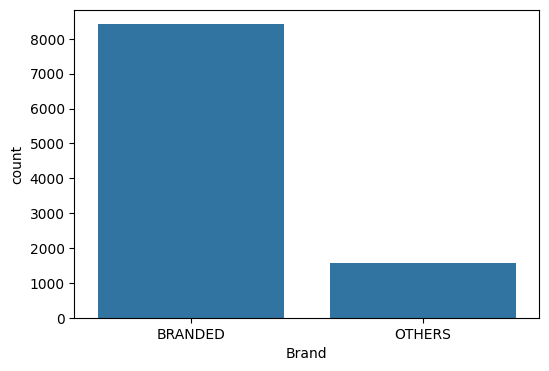

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x=df['Brand'].apply(lambda x: 'OTHERS' if x == 'OTHERS' else 'BRANDED'),
             )
plt.show()

Almost one fifth of our products are in others, so now we should try to see a pattern in others and extract brands as much as we can

In [ ]:
x= df[df['Brand']=='OTHERS'].head(100)
x[['Product Name','Brand']]

,Product Name,Brand
2,Self-Adhesive Address Labels for Typewriters b...,OTHERS
33,Lumber Crayons,OTHERS
37,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",OTHERS
48,"LF Elite 3D Dazzle Designer Hard Case Cover, L...",OTHERS
51,Longer-Life Soft White Bulbs,OTHERS
55,Home/Office Personal File Carts,OTHERS
58,"Array Parchment Paper, Assorted Colors",OTHERS
60,Plastic Binding Combs,OTHERS
69,Snap-A-Way Black Print Carbonless Ruled Speed ...,OTHERS
71,Telephone Message Books with Fax/Mobile Sectio...,OTHERS


In [ ]:
import re
def fill_brand_from_by(row):
    # Only check rows where Brand is OTHERS
    if row["Brand"] == "OTHERS":
        match = re.search(r"\bby\s+([A-Za-z0-9\-&]+)", row["Product Name"], flags=re.I)
        if match:
            return match.group(1).upper()
    return row["Brand"]

df["Brand"] = df.apply(fill_brand_from_by, axis=1)

In [ ]:
df['Brand'].value_counts(ascending = False)

,count
Brand,
OTHERS,1492
XEROX,865
AVERY,553
GBC,342
GLOBAL,284
NEWELL,276
ELDON,245
FELLOWES,230
LOGITECH,217


In [ ]:
x= df[df['Brand']=='OTHERS'].tail(300)
x[['Product Name','Brand']]

,Product Name,Brand
7902,Colored Envelopes,OTHERS
7905,Staple envelope,OTHERS
7913,"Letter/Legal File Tote with Clear Snap-On Lid,...",OTHERS
7920,Micro Innovations Wireless Classic Keyboard wi...,OTHERS
7925,Alphabetical Labels for Top Tab Filing,OTHERS
7933,Staple envelope,OTHERS
7938,Standard Rollaway File with Lock,OTHERS
7943,Staple remover,OTHERS
7954,Zipper Ring Binder Pockets,OTHERS
7956,Staples,OTHERS


In [ ]:
brand_phrases = [
    "Office Star",
    "Clear Mylar",
    "Design Ebony",
    "Longer-Life",
    "LF",
    "Wirebound",
    "First Data",
    "Deluxe",
    "Blue Parrot",
    "Peel & Stick",
    "Cyber Acoustics",
    "Space Solutions",
    "Eldon"
]

def fill_brand_from_phrases(row):
    if row["Brand"] == "OTHERS":
        for phrase in brand_phrases:
            if phrase.lower() in row["Product Name"].lower():
                return phrase.upper()
    return row["Brand"]

df["Brand"] = df.apply(fill_brand_from_phrases, axis=1)

In [ ]:
df['Brand'].value_counts(ascending = False)

,count
Brand,
OTHERS,1234
XEROX,865
AVERY,553
GBC,342
GLOBAL,284
NEWELL,276
ELDON,251
FELLOWES,230
LOGITECH,217


### Checking data frame and datatypes

In [ ]:
df.head(100)

,Row ID,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Prefix,Order_ID,Order_Month,Order_Day,Order_Year,Ship_Month,Ship_Day,Ship_Year,Customer_Name_Abbr,Customer_ID,Customer_Name,Product_ID,Unit_Sales_Price,Unit_Production_Cost,Brand
0,1,Second Class,Consumer,HENDERSON,KENTUCKY,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0,41.9136,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE,10001798,130.98,110.0232,BUSH
1,2,Second Class,Consumer,HENDERSON,KENTUCKY,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.0,219.5820,CA,152156,11,8,2016,11,11,2016,CG,12520,CLAIRE GUTE,10000454,243.98,170.7860,HON
2,3,Second Class,Corporate,LOS ANGELES,CALIFORNIA,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.0,6.8714,CA,138688,6,12,2016,6,16,2016,DV,13045,DARRIN VAN HUFF,10000240,7.31,3.8743,UNIVERSAL
3,4,Standard Class,Consumer,FORT LAUDERDALE,FLORIDA,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45.0,-383.0310,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL,10000577,348.21,424.8162,BRETFORD
4,5,Standard Class,Consumer,FORT LAUDERDALE,FLORIDA,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20.0,2.5164,US,108966,10,11,2015,10,18,2015,SO,20335,SEAN O'DONNELL,10000760,13.98,12.7218,ELDON
5,6,Standard Class,Consumer,LOS ANGELES,CALIFORNIA,90032,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.0,14.1694,CA,115812,6,9,2014,6,14,2014,BH,11710,BROSINA HOFFMAN,10001487,6.98,4.9558,ELDON
6,7,Standard Class,Consumer,LOS ANGELES,CALIFORNIA,90032,West,Office Supplies,Art,Newell 322,7.2800,4,0.0,1.9656,CA,115812,6,9,2014,6,14,2014,BH,11710,BROSINA HOFFMAN,10002833,1.82,1.3286,NEWELL
7,8,Standard Class,Consumer,LOS ANGELES,CALIFORNIA,90032,West,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,20.0,90.7152,CA,115812,6,9,2014,6,14,2014,BH,11710,BROSINA HOFFMAN,10002275,188.99,173.8708,MITEL
8,9,Standard Class,Consumer,LOS ANGELES,CALIFORNIA,90032,West,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,20.0,5.7825,CA,115812,6,9,2014,6,14,2014,BH,11710,BROSINA HOFFMAN,10003910,7.71,5.7825,DXL
9,10,Standard Class,Consumer,LOS ANGELES,CALIFORNIA,90032,West,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.0,34.4700,CA,115812,6,9,2014,6,14,2014,BH,11710,BROSINA HOFFMAN,10002892,22.98,16.0860,BELKIN


In [ ]:
df.dtypes

,0
Row ID,int64
Ship Mode,object
Segment,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Product Name,object


we will change the order of columns and their data type in Power BI and for now we will save our csv in our data directory

In [ ]:
output_path = "/content/drive/MyDrive/Data Analysis Projects/Superstore Dataset/data/Superstore_Cleaned.csv"

# Save with UTF-8 encoding, no index
df.to_csv(output_path, index=False, encoding="utf-8")

print(f"✅ Cleaned CSV saved to: {output_path}")


✅ Cleaned CSV saved to: /content/drive/MyDrive/Data Analysis Projects/Superstore Dataset/data/Superstore_Cleaned.csv
